In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D

# How the FFT works, speed tests

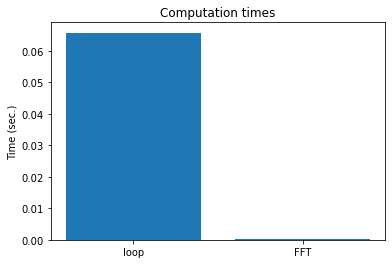

In [2]:
# create the signal
pnts   = 1000
signal = np.random.randn(pnts)


# start the timer for "slow" Fourier transform
tic = timeit.default_timer()

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )

# end timer for slow Fourier transform
toc = timeit.default_timer()
t1 = toc-tic



# time the fast Fourier transform
tic = timeit.default_timer()
fCoefsF = scipy.fftpack.fft(signal)
toc = timeit.default_timer()
t2 = toc-tic

# and plot
plt.bar([1,2],[t1,t2])
plt.title('Computation times')
plt.ylabel('Time (sec.)')
plt.xticks([1,2], ['loop','FFT'])
plt.show()


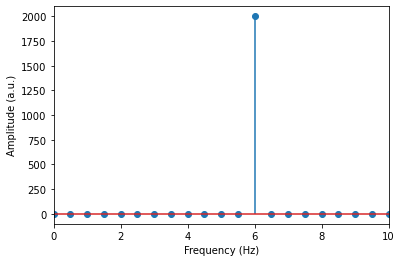

In [64]:
## fft still need normalizations

srate = 1000
time  = np.arange(0,2,1/srate)
npnts = len(time)

# signal
signal = 2*np.sin(2*np.pi*6*time)

# Fourier spectrum
signalX = scipy.fftpack.fft(signal)
hz = np.linspace(0,srate,npnts)

# amplitude
ampl = np.abs(signalX[0:len(hz)])

plt.stem(hz,ampl)
plt.xlim(0,10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

# The fast inverse Fourier transform

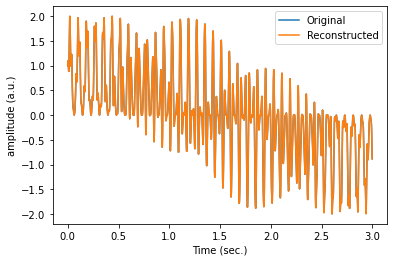

In [4]:
# set parameters
srate = 1000
time  = np.arange(0,3,1/srate)
pnts  = len(time)

# create multispectral signal
signal  = np.multiply( (1+np.sin(2*np.pi*12*time)) , np.cos(np.sin(2*np.pi*25*time)+time) )

# fft
signalX = scipy.fftpack.fft(signal)

# reconstruction via ifft
reconSig = scipy.fftpack.ifft(signalX)

plt.plot(time,signal,label='Original')
plt.plot(time,np.real(reconSig),label='Reconstructed')
plt.xlabel('Time (sec.)')
plt.ylabel('amplitude (a.u.)')
plt.legend()
plt.show()

# The perfection of the Fourier transform

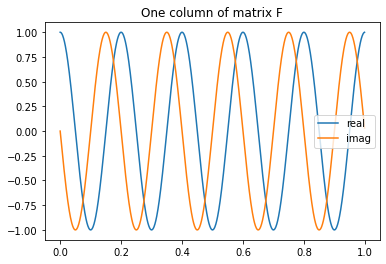

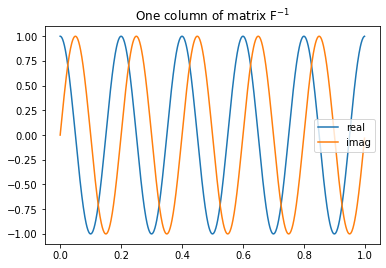

In [7]:
# number of time points
pnts = 1000 

# prepare the Fourier transform
fourTime = np.arange(0,pnts)/pnts
F        = np.zeros((pnts,pnts),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # put csw into column of matrix F
    F[:,fi] = csw

# compute inverse of F (and normalize by N)
Finv = np.linalg.inv(F)*pnts

# plot one sine wave
plt.plot(fourTime,np.real(F[:,5]),label='real')
plt.plot(fourTime,np.imag(F[:,5]),label='imag')
plt.title('One column of matrix F')
plt.legend()
plt.show()

plt.plot(fourTime,np.real(Finv[:,5]),label='real')
plt.plot(fourTime,np.imag(Finv[:,5]),label='imag')
plt.title('One column of matrix F$^{-1}$')
plt.legend()
plt.show()

# Numpy FFT 

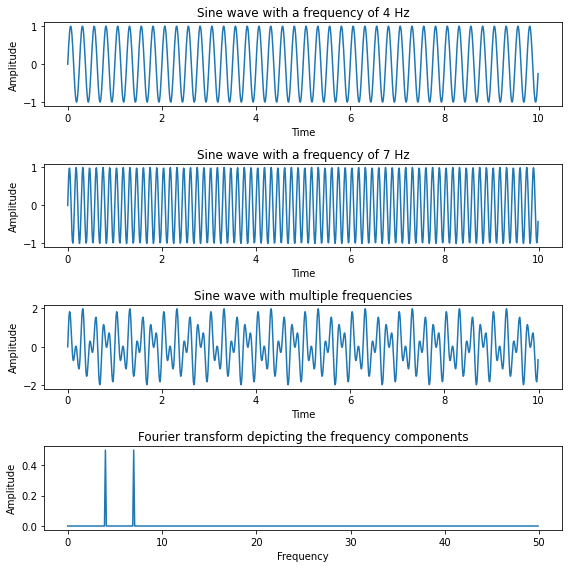

In [212]:
# Python example - Fourier transform using numpy.fft method from pythontic.com
# A good reference for numpy FFT

# How many time points are needed i,e., Sampling Frequency
samplingFrequency = 100;

# At what intervals time points are sampled
samplingInterval = 1 / samplingFrequency;

# Begin time period of the signals
beginTime = 0;

# End time period of the signals
endTime = 10; 

# Frequency of the signals
signal1Frequency = 4;
signal2Frequency = 7;

# Time points
time = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot
figure, axis = plt.subplots(4, 1, figsize=(8,8))

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Add the sine waves
amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
 
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')
 
plt.tight_layout()
plt.show()

In [220]:
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

frequencies.max()

49.9

# Using FFT on matrices

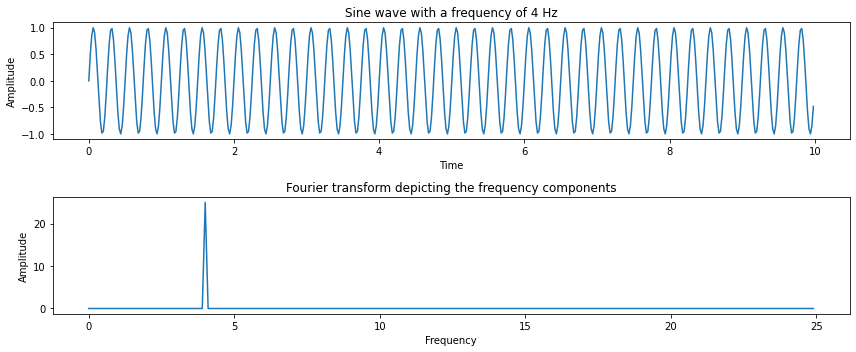

In [243]:
# How many time points are needed i,e., Sampling Frequency
samplingFrequency = 50;

# At what intervals time points are sampled
samplingInterval = 1 / samplingFrequency;

# Begin time period of the signals
beginTime = 0;

# End time period of the signals
endTime = 10; 

# Frequency of the signal
signalFrequency = 4;

# Time points
time = np.arange(beginTime, endTime, samplingInterval);

# Create a sine wave
signal = np.sin(2*np.pi*signalFrequency*time)

# Create a dataset of repeated sine waves
repetitions = 50
amplitudes = np.tile(signal,(repetitions, 1)) # OR data = np.array([time]*repetitions)

# Create subplot
fig, axis = plt.subplots(2, 1, figsize=(12,5))

# Time domain representation for a row of dataset
axis[0].set_title(f'Sine wave with a frequency of {signalFrequency} Hz')
axis[0].plot(time, amplitudes[0,:])
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Frequency domain representation
fourierTransforms = np.fft.fftn(amplitudes)/len(amplitudes[0,:])             # Normalize amplitude
fourierTransforms = fourierTransforms[:,range(int(len(amplitudes[0,:])/2))]   # Exclude sampling frequency
 
tpCount     = len(amplitudes[0,:])
values      = np.arange(int(tpCount)/2)
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[1].set_title('Fourier transform depicting the frequency components')
axis[1].plot(frequencies, abs(fourierTransforms[0,:]))
axis[1].set_xlabel('Frequency')
axis[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()